# 1. Formalizing the Problem as a Markov Decision Process (MDP)
To model the 3x3 grid world as an MDP, we need to define its components:

State space (S): The set of all possible locations (cells) in the grid. Each state is represented by the coordinates (i,j), where i is the row and j is the column. Since it is a 3x3 grid, there are 9 states: S={ (1,1) , (1,2) , (1,3) , (2,1) , (2,2) , (2,3) , (3,1) , (3,2) , (3,3) }.

Action space (A): The agent can take one of four actions at any state:

Up (↑)
Down (↓)
Left (←)
Right (→)

Transition function (T): Describes the probability of moving to a new state given the current state and action. Since the actions deterministically cause the agent to move, except when they attempt an invalid move (which keeps the agent in the same state with a reward of -1), the transition function is deterministic.

Reward function (R): The rewards for moving between states are given in the problem. If the agent takes an invalid action, it receives a reward of -1.

Discount factor (γ): Given as 0.7, meaning the agent values future rewards less than immediate rewards.

# 2. Size of the State and Action Spaces
State space size: There are 9 states in the 3x3 grid.

Action space size: There are 4 possible actions (up, down, left, right).

Thus, the state space size is 9, and the action space size is 4.

# 3. Rewards and Subsequent States for Policies
For each state and action, we need to determine the next state and reward under each policy.

### Current state: (1,1)
Up:
𝜋
1
 : No permitted move, stays in (1,1), reward = -1.

𝜋
2
​
 : Same as above.

𝜋
3
​
 : Same as above.

Down:
𝜋
1
​
 : Moves to (2,1), reward = 2/3.

𝜋
2
​
 : Moves to (2,1), reward = 2/3.

𝜋
3
​
 : Moves to (2,1), reward = 2/3.
 
Right:
𝜋
1
​
 : Moves to (1,2), reward = 1.

𝜋
2
​
 : Moves to (1,2), reward = 1.

𝜋
3
​
 : Moves to (1,2), reward = 1.

Left:
𝜋
1
​
 : No permitted move, stays in (1,1), reward = -1.

𝜋
2
​
 : Same as above.

𝜋
3
​
 : Same as above.
### Current state: (2,2)
Up:

𝜋
1
​
 : Moves to (1,2), reward = 1/4.

𝜋
2
​
 : Uniform random action (1/4 probability for each), so we compute the average reward over the 4 possible outcomes.

𝜋
3
​
 : Same as 
𝜋
2
​
 .
 
Down:

𝜋
1
​
 : Moves to (3,2), reward = 3.

𝜋
2
​
 : Same as above.

𝜋
3
​
 : Same as above.

Right:

𝜋
1
​
 : Moves to (2,3), reward = 3/2.

𝜋
2
​
 : Uniform random action (1/4 probability for each), average reward.

𝜋
3
​
 : Same as 
𝜋
2
​
 .
 
Left:

𝜋
1
​
 : Moves to (2,1), reward = 1/3.

𝜋
2
​
 : Uniform random action (1/4 probability for each).
 
𝜋
3
​
 : Same as 
𝜋
2
​
 .
### Current state: (3,1)
Up:

𝜋
1
​
 : Moves to (2,1), reward = 1/3.

𝜋
2
​
 : Moves to (2,1), reward = 1/3.

𝜋
3
​
 : Moves to (2,1), reward = 1/3.

Down:

𝜋
1
​
 : No permitted move, stays in (3,1), reward = -1.

𝜋
2
​
 : Same as above.

𝜋
3
​
 : Same as above.

Right:

𝜋
1
​
 : Moves to (3,2), reward = 4/5.

𝜋
2
​
 : Moves to (3,2), reward = 4/5.

𝜋
3
​
 : Moves to (3,2), reward = 4/5.

Left:

𝜋
1
​
 : No permitted move, stays in (3,1), reward = -1.

𝜋
2
​
 : Same as above.
 
𝜋
3
​
 : Same as above.

# 4. Continuing or Episodic Task
This problem seems episodic, as there is a clear goal for the agent to maximize rewards, and each "episode" can be treated as navigating through the grid, reaching a certain end. Each episode terminates after a fixed number of steps.

# 5. How to Transform it into an Episodic Task
To explicitly make the task episodic:

Define a goal state (e.g., reaching state (3,3)).
End the episode once the agent reaches the goal state or after a fixed number of steps (e.g., 20 steps).

# 6. Initialize the Policies
π1: If row ≠ 3, go down; otherwise, go right.

π2: Complex policy with different actions depending on the position.

π3: Equidistributed directions (1/4 probability for each action).

# 7. Define the Reward Function
The reward function R(s,a) assigns a scalar value for each state-action pair. For example:

In [ ]:
def reward_function(state, action):
    if invalid_action(state, action):
        return -1
    else:
        return get_reward_for_transition(state, action)

# 8. Define the State Transition Function
The state transition function defines the next state based on the current state and action.

In [ ]:
def state_transition(state, action):
    if invalid_action(state, action):
        return state  # Stay in the same state if the action is invalid.
    else:
        return get_next_state(state, action)

# 9. Define select_action()
This function selects an action based on the current state and the policy.

In [ ]:
def select_action(state, policy):
    return np.random.choice(actions, p=policy[state])

# 10. Define get_trajectory()
This function simulates an episode based on a given policy.

In [ ]:
def get_trajectory(policy, start_state):
    trajectory = []
    state = start_state
    for step in range(episode_length):
        action = select_action(state, policy)
        reward = reward_function(state, action)
        next_state = state_transition(state, action)
        trajectory.append((state, action, reward))
        state = next_state
    return trajectory


# 11. Define get_returns()
This function calculates the discounted returns.

In [ ]:
def get_returns(trajectory, gamma):
    returns = []
    G = 0
    for state, action, reward in reversed(trajectory):
        G = reward + gamma * G
        returns.append(G)
    returns.reverse()
    return returns


In [1]:
# solution class
gamma = 0.7
def get_returns(returns,trajectory):
    G=0
    for t , sar in enumerate(reversed(trajectory)):
        s ,a , r = sar
        G = r + gamma * G
        if s in returns:
            returns[s].append(G)
        else:
            returns[s] = [G]
    return returns

# 13. If γ = 1, Which Must be True?
b. The reward is not discounted: If 
γ=1, future rewards are valued equally with present rewards, so there is no discounting.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment: 3x3 grid world with rewards and state transitions
grid_size = (3, 3)
states = [(i, j) for i in range(1, 4) for j in range(1, 4)]
actions = ['up', 'down', 'left', 'right']
state_idx = {state: idx for idx, state in enumerate(states)}

rewards = {
    # State (1,1)
    ((1,1), 'right'): 1,
    ((1,1), 'down'): 2/3,

    # State (1,2)
    ((1,2), 'right'): 3/2,
    ((1,2), 'down'): 2,
    ((1,2), 'left'): 1/2,

    # State (1,3)
    ((1,3), 'left'): 1/2,
    ((1,3), 'down'): 5/2,

    # State (2,1)
    ((2,1), 'up'): 1/3,
    ((2,1), 'right'): 4/3,
    ((2,1), 'down'): 3/2,

    # State (2,2)
    ((2,2), 'up'): 1/4,
    ((2,2), 'right'): 3/2,
    ((2,2), 'down'): 3,
    ((2,2), 'left'): 1/3,

    # State (2,3)
    ((2,3), 'up'): 1/4,
    ((2,3), 'down'): 7/2,
    ((2,3), 'left'): 1,

    # State (3,1)
    ((3,1), 'right'): 4/5,
    ((3,1), 'up'): 1/2,

    # State (3,2)
    ((3,2), 'right'): 3,
    ((3,2), 'up'): 4/5,
    ((3,2), 'left'): 1,

    # State (3,3)
    ((3,3), 'up'): 1/2,
    ((3,3), 'left'): 4/5,
}


# Transition table
transitions = {
    # State (1,1)
    ((1,1), 'right'): (1,2),
    ((1,1), 'down'): (2,1),

    # State (1,2)
    ((1,2), 'right'): (1,3),
    ((1,2), 'down'): (2,2),
    ((1,2), 'left'): (1,1),

    # State (1,3)
    ((1,3), 'down'): (2,3),
    ((1,3), 'left'): (1,2),

    # State (2,1)
    ((2,1), 'up'): (1,1),
    ((2,1), 'right'): (2,2),
    ((2,1), 'down'): (3,1),

    # State (2,2)
    ((2,2), 'up'): (1,2),
    ((2,2), 'right'): (2,3),
    ((2,2), 'down'): (3,2),
    ((2,2), 'left'): (2,1),

    # State (2,3)
    ((2,3), 'up'): (1,3),
    ((2,3), 'down'): (3,3),
    ((2,3), 'left'): (2,2),

    # State (3,1)
    ((3,1), 'right'): (3,2),
    ((3,1), 'up'): (2,1),

    # State (3,2)
    ((3,2), 'right'): (3,3),
    ((3,2), 'up'): (2,2),
    ((3,2), 'left'): (3,1),

    # State (3,3)
    ((3,3), 'up'): (2,3),
    ((3,3), 'left'): (3,2),
}


# If action is invalid (e.g., moving up from row 1), the agent stays in place.
invalid_actions = {
    # First row cannot move up
    (1,1): ['up', 'left'],
    (1,2): ['up'],
    (1,3): ['up', 'right'],

    # First column cannot move left
    (2,1): ['left'],
    (3,1): ['left'],

    # Third row cannot move down
    (3,1): ['down'],
    (3,2): ['down'],
    (3,3): ['down', 'right'],

    # Third column cannot move right
    (1,3): ['right'],
    (2,3): ['right'],
    (3,3): ['right'],
}


# Define the reward function
def reward_function(state, action):
    return rewards.get((state, action), -1)  # Default reward is -1 for invalid actions

# Define the state transition function
def state_transition(state, action):
    if action in invalid_actions.get(state, []):
        return state  # Invalid move, stay in the same state
    return transitions.get((state, action), state)  # Default to staying in place if transition not defined

# Define policies
def policy_1(state):
    """Policy 1: if row != 3, go down; otherwise, go right."""
    if state[0] != 3:
        return 'down'
    return 'right'

def policy_2(state):
    """Policy 2: various probability distributions based on the state."""
    if state == (2, 2):
        return np.random.choice(actions)  # Equal probability for all actions
    if state != (2, 2):
        return 'down' if state[1] == 2 else 'right'
    return 'down'

def policy_3(state):
    """Policy 3: equidistributed actions for all states."""
    return np.random.choice(actions)

# Define a select_action function to choose an action based on the policy
def select_action(state, policy_func):
    return policy_func(state)


In [10]:
def get_trajectory(policy_func, start_state, num_moves=1000):
    """Simulate an episode with a given policy and return the trajectory."""
    trajectory = []
    state = start_state
    for _ in range(num_moves):
        action = select_action(state, policy_func)
        reward = reward_function(state, action)
        next_state = state_transition(state, action)
        trajectory.append((state, action, reward))
        state = next_state
    return trajectory

def get_discounted_returns(trajectory, gamma):
    """Calculate the discounted returns for the given trajectory."""
    discounted_returns = []
    G = 0
    for state, action, reward in reversed(trajectory):
        G = reward + gamma * G
        discounted_returns.append(G)
    return list(reversed(discounted_returns))

def simulate_policy(policy_func, gamma, num_episodes=1000, num_moves=1000):
    """Simulate multiple episodes for a given policy and return the averaged returns."""
    total_returns = np.zeros(num_moves)
    for _ in range(num_episodes):
        trajectory = get_trajectory(policy_func, start_state=(1, 1), num_moves=num_moves)
        discounted_returns = get_discounted_returns(trajectory, gamma)
        total_returns += discounted_returns
    return total_returns / num_episodes

# 12. Compute Value Function Using Monte Carlo Method
You can now simulate multiple episodes, compute the discounted returns, and average them to estimate the value function for each state under each policy.

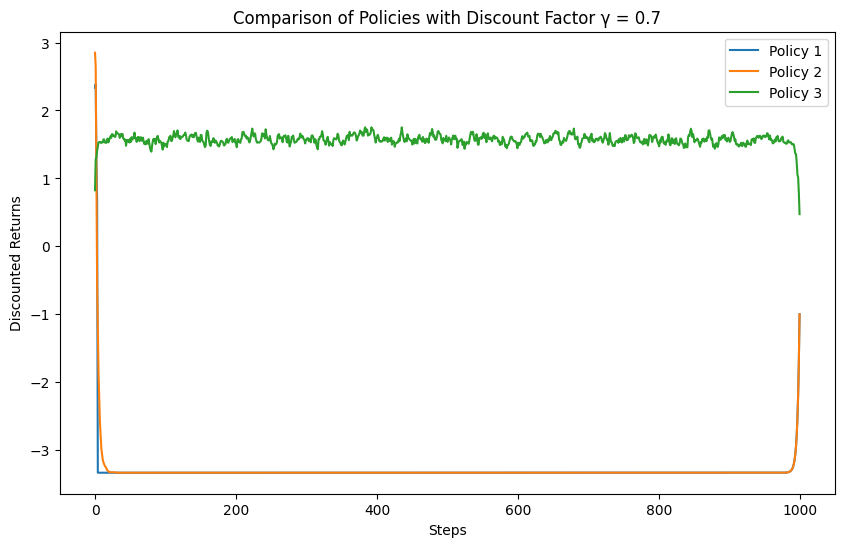

In [11]:
def plot_policy_comparison(num_moves, gamma, num_episodes=1000):
    # Simulate policies
    returns_policy_1 = simulate_policy(policy_1, gamma, num_episodes, num_moves)
    returns_policy_2 = simulate_policy(policy_2, gamma, num_episodes, num_moves)
    returns_policy_3 = simulate_policy(policy_3, gamma, num_episodes, num_moves)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(returns_policy_1, label='Policy 1')
    plt.plot(returns_policy_2, label='Policy 2')
    plt.plot(returns_policy_3, label='Policy 3')
    plt.title(f'Comparison of Policies with Discount Factor γ = {gamma}')
    plt.xlabel('Steps')
    plt.ylabel('Discounted Returns')
    plt.legend()
    plt.show()

# Run the simulation and plot the results
plot_policy_comparison(num_moves=1000, gamma=0.7, num_episodes=1000)